#Importing **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#REading the csv file
df=pd.read_csv('/content/avocado.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [ ]:
#column names
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [ ]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


#Null values

In [ ]:
df.isnull().sum()


Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

THere is almost 14k null values in the dataset.SO dropping the nullvaluess.

In [ ]:

#DRopping the null values
df = df.dropna()

In [ ]:
df.shape

(1517, 14)

THe dataset has decreased to 1517 after dropping all the null values.

#Value counts

In [ ]:
df['region'].value_counts() # for column region

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [ ]:
df['type'].value_counts() #for column type

conventional    1517
Name: type, dtype: int64

In [ ]:
df['XLarge Bags'].value_counts()#for column XLarge Bags

0.00        798
1.63          2
7.08          2
25.26         2
6.16          2
           ... 
17202.07      1
23926.61      1
4465.52       1
3754.42       1
825.00        1
Name: XLarge Bags, Length: 711, dtype: int64

In [ ]:
#DRoping the column type
df=df.drop(columns=['type','Unnamed: 0'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany


In [ ]:
# Create a new column 'month_numeric' with a numeric representation of each month
df['Date'] = pd.to_datetime(df['Date'])

df['month_numeric'] = (df['Date'].dt.year - df['Date'].dt.year.min()) * 12 + df['Date'].dt.month


In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month_numeric
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany,11


In [ ]:
#New column info
df['month_numeric'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1517 entries, 0 to 1516
Series name: month_numeric
Non-Null Count  Dtype
--------------  -----
1517 non-null   int64
dtypes: int64(1)
memory usage: 23.7 KB


In [ ]:
#Value count of month_numeric
df['month_numeric'].value_counts()

5     142
8     140
3     126
12    120
1     119
6     117
11    105
4     103
9      79
2      78
10     72
7      69
15     32
23     26
22     26
13     22
14     22
16     21
19     18
17     18
20     17
18     17
24     16
21     12
Name: month_numeric, dtype: int64

In [ ]:
#mapping the months to one particular unique numbers
df['month_numeric'] = df['month_numeric'].replace({
   13:1,14:2,15:3,16:4,17:5,18:6,19:7,20:8,21:9,22:10,23:11,24:12
})

In [ ]:
#Checking the value counts
df['month_numeric'].value_counts()

5     160
3     158
8     157
1     141
12    136
6     134
11    131
4     124
2     100
10     98
9      91
7      87
Name: month_numeric, dtype: int64

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month_numeric
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany,11


In [ ]:
#Creating a ne column and replacing the values of coulmn "month_numeric" to respective months
df['month_cat']= df['month_numeric'].replace({
   1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'may',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'
})

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month_numeric,month_cat
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany,12,Dec
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany,12,Dec
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany,12,Dec
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany,6,Jun
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany,11,Nov


In [ ]:
#Droping the unnecessary columns
df=df.drop(columns=['Date'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month_numeric,month_cat
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany,12,Dec
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany,12,Dec
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany,12,Dec
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany,6,Jun
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany,11,Nov


#Plots

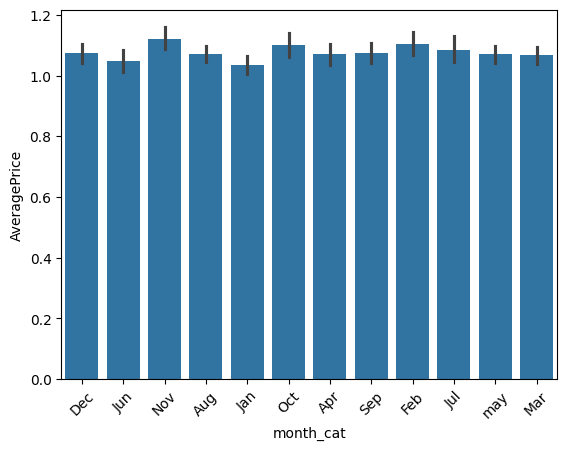

In [ ]:
# barplot month_cat to average price

sns.barplot(x='month_cat', y='AveragePrice', data=df)
plt.xticks(rotation=45)
plt.show()


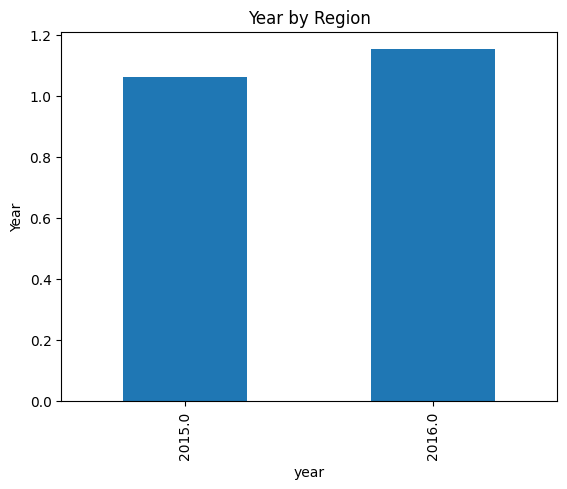

In [ ]:
# Grouping the data by Year

df.groupby('year').mean()['AveragePrice'].plot(kind='bar')
plt.title('Year by Region')
plt.ylabel('Year')
plt.show()

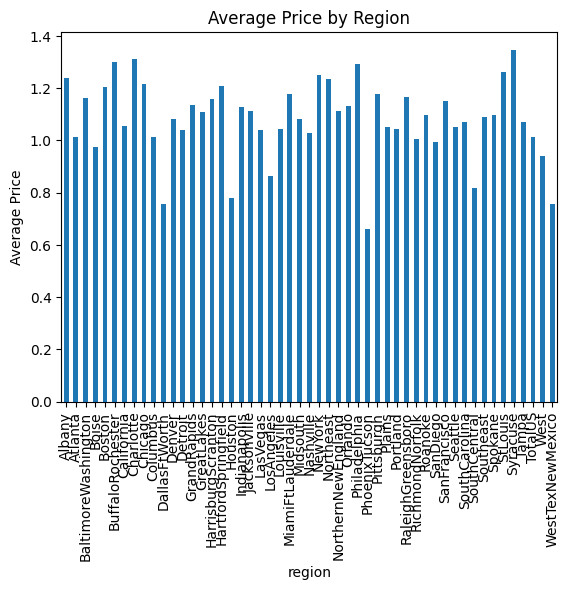

In [ ]:
# Average price by region by groping the data by Region

df.groupby('region').mean()['AveragePrice'].plot(kind='bar')
plt.title('Average Price by Region')
plt.ylabel('Average Price')
plt.show()


In [ ]:
#treating outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
df1 = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(881, 13)

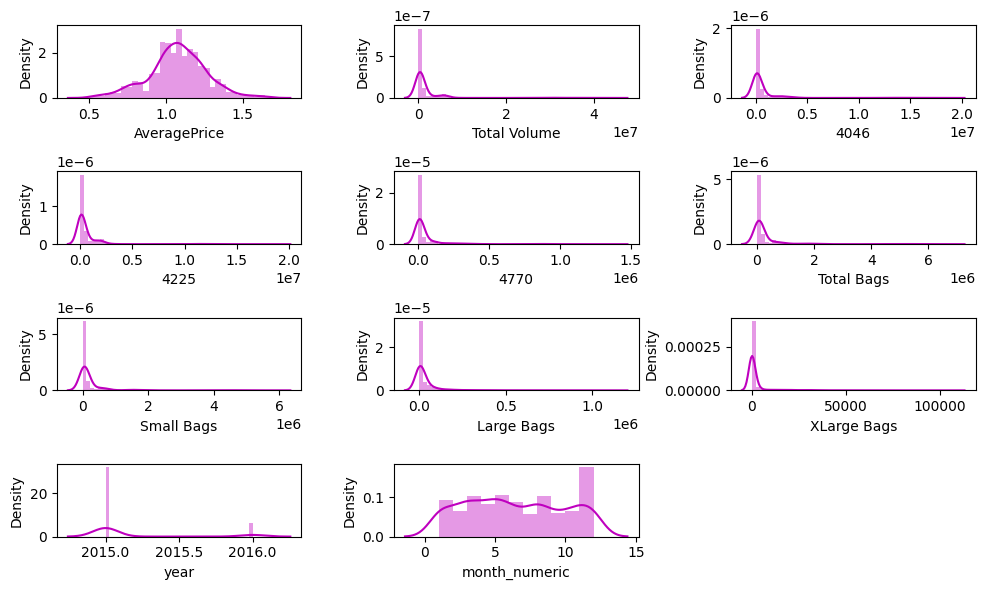

In [ ]:
#distribution plot
plt.figure(figsize=(10, 6),facecolor='white')
plotnumber = 1

for i in df:
  if df[i].dtype != 'O':
      if plotnumber <= 12:
          ax = plt.subplot(4, 3, plotnumber)
          sns.distplot(df[i], color='m')  # Use histplot instead of displot for individual axes
          plt.xlabel(i)
          plt.yticks(rotation=0, fontsize=10)
      plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
df.skew()

AveragePrice    -0.109444
Total Volume     6.200138
4046             6.051830
4225             6.394926
4770             5.405164
Total Bags       5.366378
Small Bags       5.355185
Large Bags       5.144495
XLarge Bags      5.775077
year             1.828332
month_numeric    0.101439
dtype: float64

<Axes: >

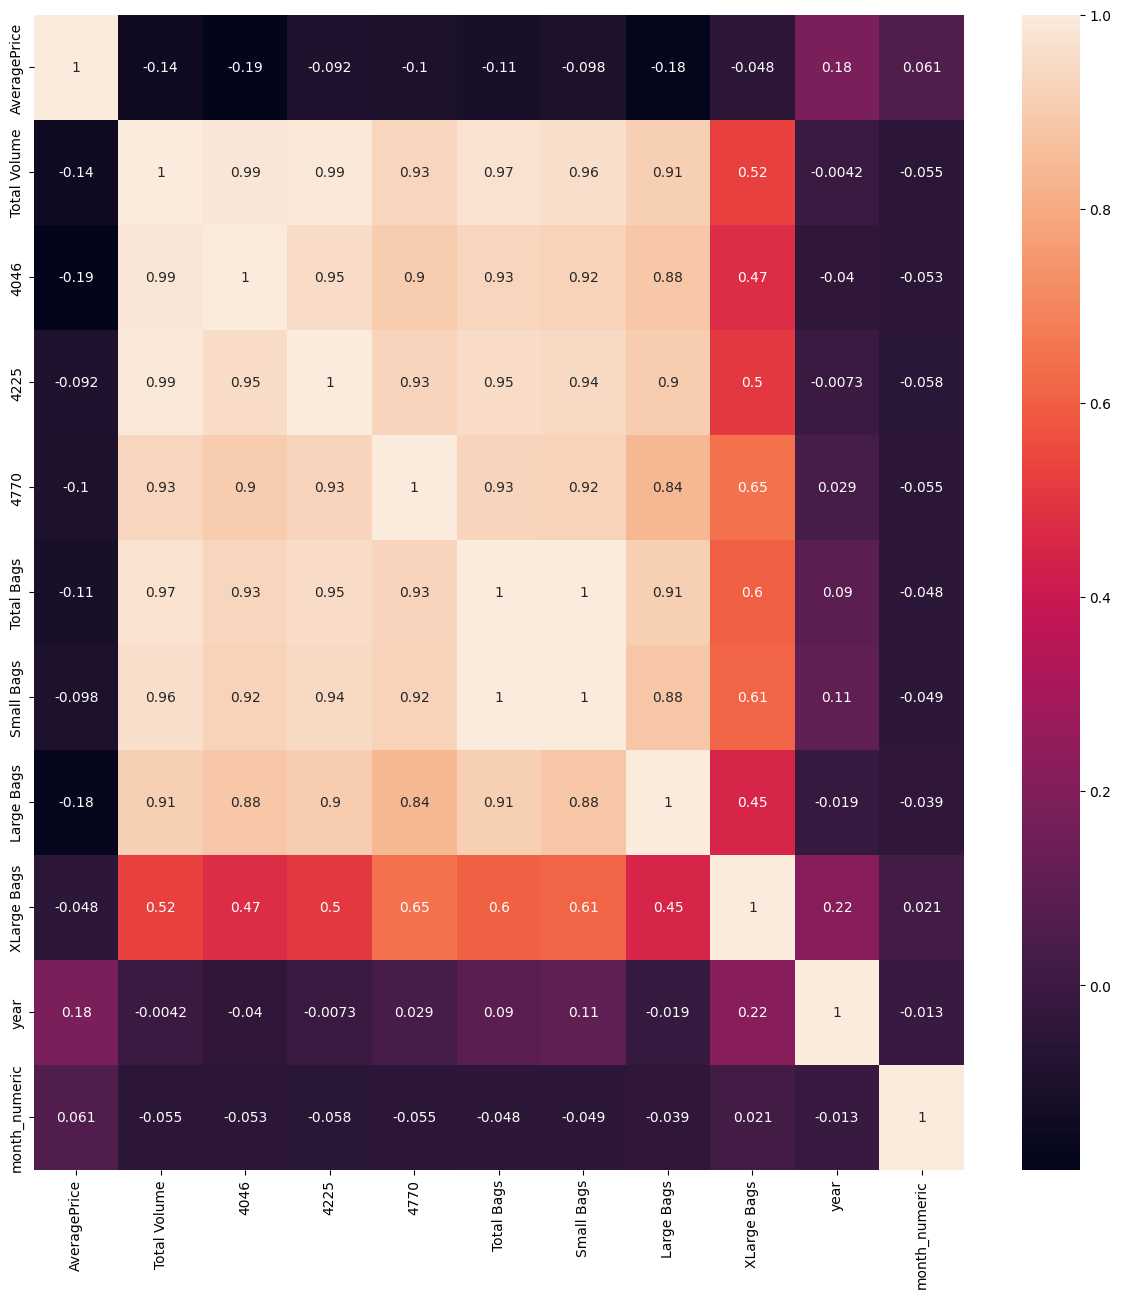

In [ ]:
#Correlation Plots
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df=df.drop(columns=['month_cat'])

#Label Encoder

In [ ]:
#changing cat val to digits
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = le.fit_transform(df[col])

In [ ]:
#Mapping of numeric values to original categories:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping of numeric values to original categories:")
print(mapping)

Mapping of numeric values to original categories:
{'Albany': 0, 'Atlanta': 1, 'BaltimoreWashington': 2, 'Boise': 3, 'Boston': 4, 'BuffaloRochester': 5, 'California': 6, 'Charlotte': 7, 'Chicago': 8, 'Columbus': 9, 'DallasFtWorth': 10, 'Denver': 11, 'Detroit': 12, 'GrandRapids': 13, 'GreatLakes': 14, 'HarrisburgScranton': 15, 'HartfordSpringfield': 16, 'Houston': 17, 'Indianapolis': 18, 'Jacksonville': 19, 'LasVegas': 20, 'LosAngeles': 21, 'Louisville': 22, 'MiamiFtLauderdale': 23, 'Midsouth': 24, 'Nashville': 25, 'NewYork': 26, 'Northeast': 27, 'NorthernNewEngland': 28, 'Orlando': 29, 'Philadelphia': 30, 'PhoenixTucson': 31, 'Pittsburgh': 32, 'Plains': 33, 'Portland': 34, 'RaleighGreensboro': 35, 'RichmondNorfolk': 36, 'Roanoke': 37, 'SanDiego': 38, 'SanFrancisco': 39, 'Seattle': 40, 'SouthCarolina': 41, 'SouthCentral': 42, 'Southeast': 43, 'Spokane': 44, 'StLouis': 45, 'Syracuse': 46, 'Tampa': 47, 'TotalUS': 48, 'West': 49, 'WestTexNewMexico': 50}


In [ ]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month_numeric
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0,11


#**Predicting Region Using Classification**




In [ ]:
x=df.drop('region',axis=1)
y=df['region']

In [ ]:
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month_numeric
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,11


In [ ]:
# List of columns to treat for skewness
skewed_columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Applying log transformation to each column
for col in skewed_columns:
    x[col] = np.log1p(x[col])

In [ ]:
#SKewness
x.skew()

AveragePrice    -0.109444
Total Volume     0.667468
4046            -0.160268
4225             0.184436
4770            -0.355508
Total Bags       0.695502
Small Bags       0.713843
Large Bags      -0.912766
XLarge Bags      0.783913
year             1.828332
month_numeric    0.101439
dtype: float64

In [ ]:
#STandazing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [ ]:
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month_numeric
0,1.350481,-1.356762,-1.828162,-0.567524,-1.810613,-1.684725,-1.539248,-0.966743,-0.810775,-0.441008,1.624154
1,1.456397,-1.466387,-2.012069,-0.684233,-1.737594,-1.620123,-1.474983,-0.953861,-0.810775,-0.441008,1.624154
2,-0.767838,-0.932139,-1.941834,-0.159241,-1.428526,-1.732326,-1.587763,-0.937531,-0.810775,-0.441008,1.624154
3,0.026531,-1.212820,-1.790572,-0.403726,-1.654003,-1.977653,-1.838106,-0.862073,-0.810775,-0.441008,-0.104453
4,1.085691,-1.516851,-1.869374,-0.694856,-1.637471,-1.932480,-1.800022,-0.748414,-0.810775,-0.441008,1.336053


#VIF Factor

In [ ]:
#VIF Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,1.614906,AveragePrice
1,49.613655,Total Volume
2,8.149029,4046
3,14.821133,4225
4,2.462291,4770
5,82.632989,Total Bags
6,69.244618,Small Bags
7,2.792138,Large Bags
8,1.744597,XLarge Bags
9,1.320161,year


In [ ]:
x.drop('Total Bags',axis=1,inplace=True)#droping the column 'Total Bags'

In [ ]:
#VIF Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,1.595776,AveragePrice
1,47.509378,Total Volume
2,8.128208,4046
3,14.652355,4225
4,2.254892,4770
5,11.097197,Small Bags
6,1.667965,Large Bags
7,1.649724,XLarge Bags
8,1.317840,year
9,1.019576,month_numeric


In [ ]:
x.drop('Total Volume',axis=1,inplace=True)#Droping the column'TOtal Volume"

In [ ]:
#VIF Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,1.478374,AveragePrice
1,3.068072,4046
2,4.486013,4225
3,2.236651,4770
4,6.568171,Small Bags
5,1.538366,Large Bags
6,1.646430,XLarge Bags
7,1.316050,year
8,1.018316,month_numeric


In [ ]:
x.drop('Small Bags',axis=1,inplace=True)#Droping the column

In [ ]:
#VIF Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,1.420768,AveragePrice
1,2.288261,4046
2,1.656808,4225
3,2.236636,4770
4,1.528540,Large Bags
5,1.601403,XLarge Bags
6,1.103088,year
7,1.017249,month_numeric


#Model Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
  RFC=RandomForestClassifier()
  RFC.fit(x_train,y_train)
  pred=RFC.predict(x_test)
  acc=accuracy_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.9802631578947368 random_state is 16


In [ ]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=maxRs)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
#RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.9758771929824561
[[26  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.90      1.00      0.95        18
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        14
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00        12
           6       0.96      1.00      0.98        24
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        10
          14  

In [ ]:
#SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.875
[[25  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.81      0.94      0.87        18
           2       0.86      0.90      0.88        20
           3       0.93      0.93      0.93        14
           4       0.93      1.00      0.97        14
           5       0.85      0.92      0.88        12
           6       1.00      1.00      1.00        24
           7       1.00      0.53      0.70        15
           8       0.80      0.57      0.67         7
           9       0.88      1.00      0.94        15
          10       1.00      0.50      0.67         6
          11       1.00      1.00      1.00         3
          12       1.00      0.93      0.97        15
          13       1.00      0.70      0.82        10
          14       0.83    

In [ ]:
#GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8771929824561403
[[24  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.82      1.00      0.90        18
           2       0.87      1.00      0.93        20
           3       1.00      0.93      0.96        14
           4       0.88      1.00      0.93        14
           5       0.79      0.92      0.85        12
           6       0.92      1.00      0.96        24
           7       1.00      0.73      0.85        15
           8       1.00      0.57      0.73         7
           9       1.00      0.73      0.85        15
          10       1.00      0.83      0.91         6
          11       0.50      0.33      0.40         3
          12       1.00      0.93      0.97        15
          13       0.90      0.90      0.90        10
          14  

In [ ]:
#AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_Ada=Ada.predict(x_test)
print(accuracy_score(y_test,pred_Ada))
print(confusion_matrix(y_test,pred_Ada))
print(classification_report(y_test,pred_Ada))

0.12719298245614036
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 8 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        20
           3       0.39      0.93      0.55        14
           4       0.04      1.00      0.07        14
           5       0.00      0.00      0.00        12
           6       0.44      0.96      0.61        24
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00      

In [ ]:
#BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc=bc.predict(x_test)
print(accuracy_score(y_test,pred_bc))
print(confusion_matrix(y_test,pred_bc))
print(classification_report(y_test,pred_bc))

0.9385964912280702
[[25  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.84      0.89      0.86        18
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        14
           4       0.88      1.00      0.93        14
           5       0.92      1.00      0.96        12
           6       0.96      1.00      0.98        24
           7       1.00      0.93      0.97        15
           8       1.00      0.86      0.92         7
           9       0.94      1.00      0.97        15
          10       0.83      0.83      0.83         6
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00        15
          13       1.00      0.80      0.89        10
          14  

In [ ]:
#ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier()
et.fit(x_train,y_train)
pred_et=et.predict(x_test)
print(accuracy_score(y_test,pred_et))
print(confusion_matrix(y_test,pred_et))
print(classification_report(y_test,pred_et))

0.6885964912280702
[[12  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  7]]
              precision    recall  f1-score   support

           0       0.86      0.46      0.60        26
           1       0.62      0.44      0.52        18
           2       0.68      0.65      0.67        20
           3       0.65      0.93      0.76        14
           4       0.56      0.71      0.63        14
           5       0.73      0.92      0.81        12
           6       0.96      0.96      0.96        24
           7       0.67      0.67      0.67        15
           8       0.50      0.43      0.46         7
           9       0.75      0.80      0.77        15
          10       0.50      0.17      0.25         6
          11       0.50      0.33      0.40         3
          12       1.00      1.00      1.00        15
          13       0.67      0.40      0.50        10
          14  

#Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create a dictionary of hyperparameters to search over for RFC
hyperparameters = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
#For Randon forest classifier
GVC = GridSearchCV(RFC, hyperparameters, cv=5, scoring='accuracy')

In [ ]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [ ]:
GVC.best_params_

{'max_features': 0.5,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
final_model= RandomForestClassifier(max_features= .5, max_samples= 0.7,min_samples_leaf= 1,min_samples_split= 2, n_estimators=100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

96.9298245614035


In [ ]:
# Create a dictionary of hyperparameters to search over for bagging classifier
hyperparameters1 = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False]
}

In [ ]:
#For Extra tree classifier
GVC1 = GridSearchCV(bc, hyperparameters1, cv=5, scoring='accuracy')


In [ ]:
GVC1.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [ ]:
GVC1.best_params_


{'bootstrap': True,
 'max_features': 0.7,
 'max_samples': 1.0,
 'n_estimators': 50}

In [ ]:
final_model_bg= BaggingClassifier(max_features= .7, max_samples= 1, n_estimators=50)
final_model_bg.fit(x_train,y_train)
pred=final_model_bg.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)


5.701754385964912


#Cross Validation

In [ ]:
#check cv score for randomforest

score=cross_val_score(final_model,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_RFC) - score.mean())

[0.88486842 0.9375     0.92409241 0.93729373 0.90429043]
0.9176089977418794
Difference between accuracy score and cross valication score is 0.05826819524057669


In [ ]:
#check cv score for Bagging

score=cross_val_score(final_model_bg,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred) - score.mean())

[0.04605263 0.03289474 0.02640264 0.04290429 0.04290429]
0.038231717908632966
Difference between accuracy score and cross valication score is 0.018785825951016154


#Regression

In [ ]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [ ]:
x.skew()

Total Volume     6.200138
4046             6.051830
4225             6.394926
4770             5.405164
Total Bags       5.366378
Small Bags       5.355185
Large Bags       5.144495
XLarge Bags      5.775077
year             1.828332
region           0.288146
month_numeric    0.101439
dtype: float64

In [ ]:
# List of columns to treat for skewness
skewed_columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Applying log transformation to each column
for col in skewed_columns:
    x[col] = np.log1p(x[col])

In [ ]:
#STandazing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

#VIF

In [ ]:
#VIF Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,50.083885,Total Volume
1,9.050939,4046
2,14.871958,4225
3,2.428395,4770
4,84.729087,Total Bags
5,65.957828,Small Bags
6,2.857868,Large Bags
7,1.847377,XLarge Bags
8,1.714709,year
9,1.735211,region


In [ ]:
x.drop('Total Bags',axis=1,inplace=True)#Droping the column

In [ ]:
#VIF Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,46.224024,Total Volume
1,8.956468,4046
2,14.508233,4225
3,2.260018,4770
4,10.784419,Small Bags
5,1.674071,Large Bags
6,1.718865,XLarge Bags
7,1.688084,year
8,1.672238,region
9,1.020249,month_numeric


In [ ]:
x.drop('Total Volume',axis=1,inplace=True)#Droping the column

In [ ]:
#VIF Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,2.566042,4046
1,4.467027,4225
2,2.242726,4770
3,6.528998,Small Bags
4,1.583173,Large Bags
5,1.702054,XLarge Bags
6,1.678076,year
7,1.592290,region
8,1.019030,month_numeric


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
#finding best random state
maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  pred=lr.predict(x_test)
  acc=r2_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.3894110226966857 random_state is 151


#Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=maxRs)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge

In [ ]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_lr))
print('MAE',mean_absolute_error(y_test,pred_lr))
print('MSE',mean_squared_error(y_test,pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 Score 0.3894110226966857
MAE 0.11822874197683504
MSE 0.022867181778126775
RMSE 0.1512189861694846


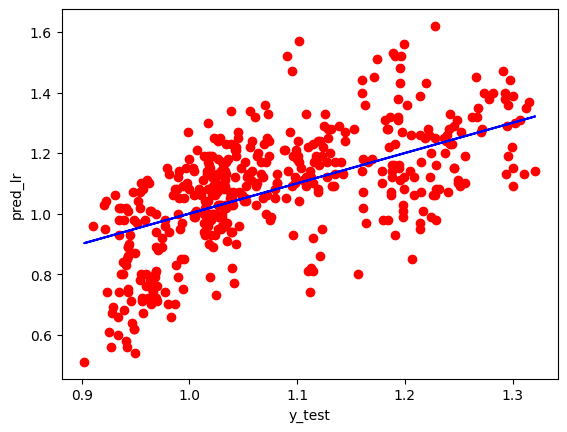

In [ ]:
plt.scatter(x=pred_lr,y=y_test,color='red')
plt.plot(pred_lr,pred_lr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_lr')
plt.show()

In [ ]:
#RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_rfr))
print('MAE',mean_absolute_error(y_test,pred_rfr))
print('MSE',mean_squared_error(y_test,pred_rfr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 Score 0.8425655695825878
MAE 0.058335745614035074
MSE 0.005896080460526315
RMSE 0.07678593921107116


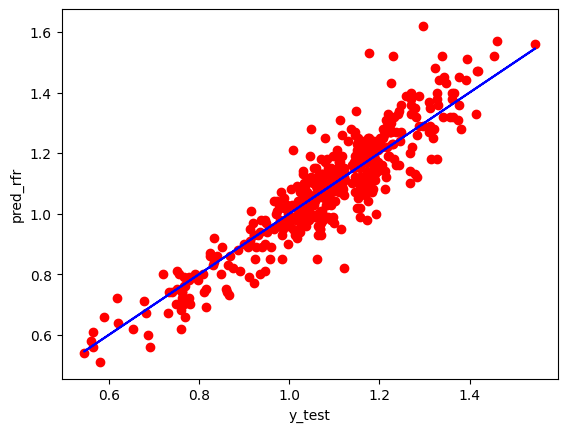

In [ ]:
plt.scatter(x=pred_rfr,y=y_test,color='red')
plt.plot(pred_rfr,pred_rfr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_rfr')
plt.show()

In [ ]:
#KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print('R2 Score',r2_score(y_test,pred_knn))
print('MAE',mean_absolute_error(y_test,pred_knn))
print('MSE',mean_squared_error(y_test,pred_knn))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score 0.6952314289519327
MAE 0.08078070175438597
MSE 0.011413894736842102
RMSE 0.10683583077246182


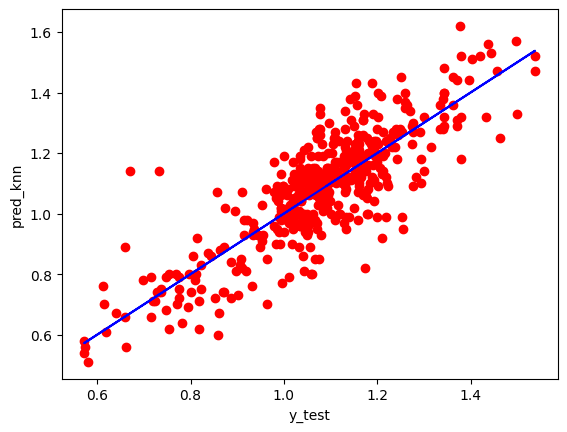

In [ ]:
plt.scatter(x=pred_knn,y=y_test,color='red')
plt.plot(pred_knn,pred_knn,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_knn')
plt.show()

In [ ]:
#GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_gbr))
print('MAE',mean_absolute_error(y_test,pred_gbr))
print('MSE',mean_squared_error(y_test,pred_gbr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_gbr)))


R2 Score 0.7545823528781641
MAE 0.07542325435960281
MSE 0.009191141925097982
RMSE 0.0958704434385175


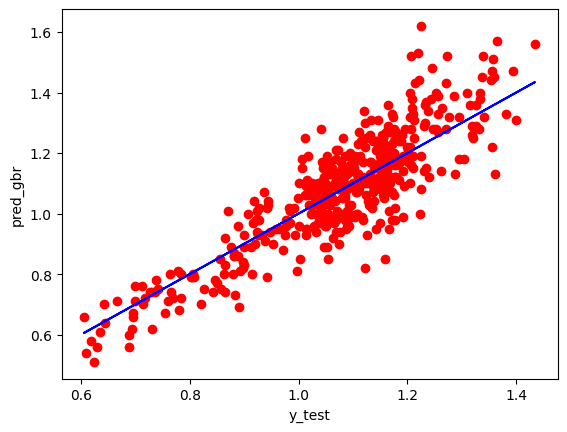

In [ ]:
plt.scatter(x=pred_gbr,y=y_test,color='red')
plt.plot(pred_gbr,pred_gbr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_gbr')
plt.show()

In [ ]:
#Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2 Score',r2_score(y_test,pred_lasso))
print('MAE',mean_absolute_error(y_test,pred_lasso))
print('MSE',mean_squared_error(y_test,pred_lasso))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 Score -0.0006181385755656965
MAE 0.14853963076872195
MSE 0.03747417283285128
RMSE 0.19358247036560744


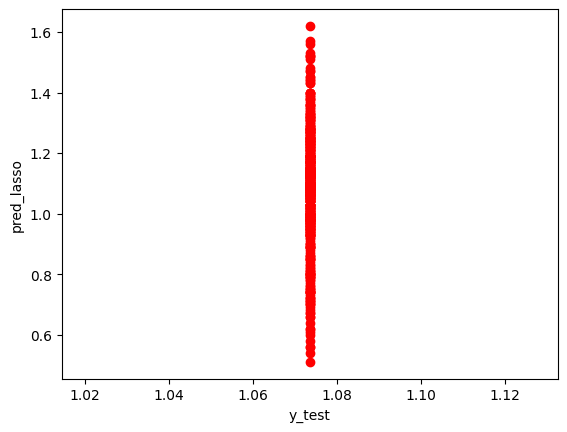

In [ ]:
plt.scatter(x=pred_lasso,y=y_test,color='red')
plt.plot(pred_lasso,pred_lasso,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_lasso')
plt.show()

In [ ]:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2 Score',r2_score(y_test,pred_ridge))
print('MAE',mean_absolute_error(y_test,pred_ridge))
print('MSE',mean_squared_error(y_test,pred_ridge))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 Score 0.38904384121949187
MAE 0.11827610689845439
MSE 0.02288093310004162
RMSE 0.15126444757457588


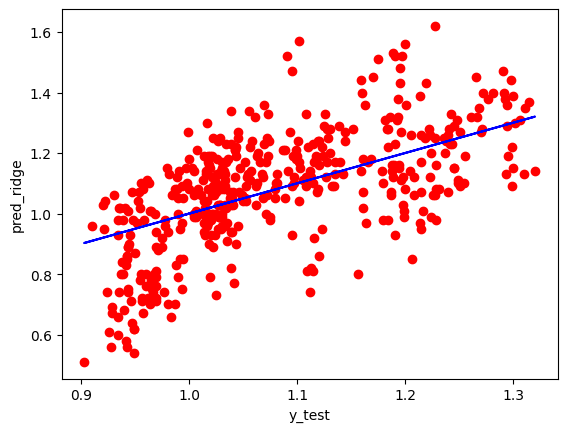

In [ ]:
plt.scatter(x=pred_ridge,y=y_test,color='red')
plt.plot(pred_ridge,pred_ridge,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_ridge')
plt.show()

In [ ]:
#DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_dtr))
print('MAE',mean_absolute_error(y_test,pred_dtr))
print('MSE',mean_squared_error(y_test,pred_dtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 Score 0.5653855857371122
MAE 0.08513157894736843
MSE 0.01627675438596491
RMSE 0.12758038401715568


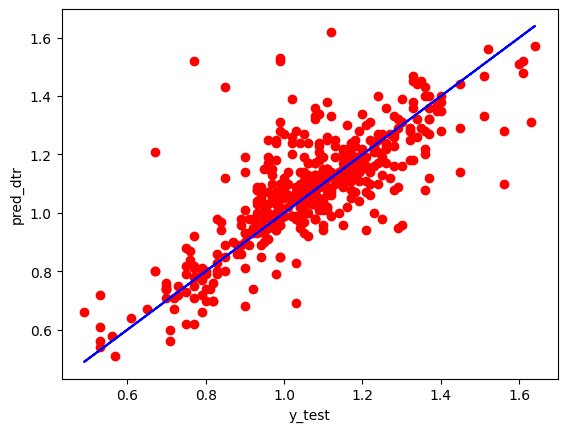

In [ ]:
plt.scatter(x=pred_dtr,y=y_test,color='red')
plt.plot(pred_dtr,pred_dtr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_dtr')
plt.show()

In [ ]:
#svr
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_svr))
print('MAE',mean_absolute_error(y_test,pred_svr))
print('MSE',mean_squared_error(y_test,pred_svr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score 0.7342630486993365
MAE 0.07919969752826536
MSE 0.009952120651432713
RMSE 0.09976031601510048


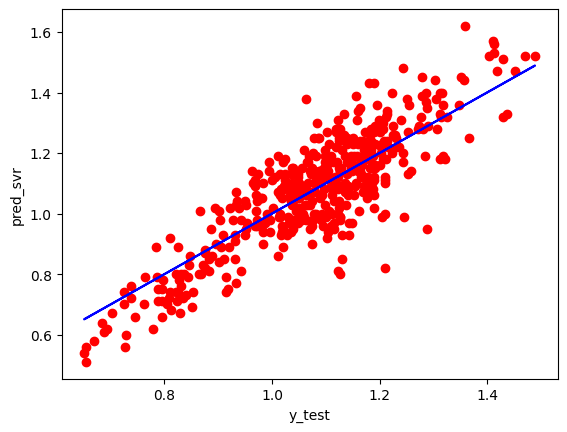

In [ ]:
plt.scatter(x=pred_svr,y=y_test,color='red')
plt.plot(pred_svr,pred_svr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_svr')
plt.show()

In [ ]:
#ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_etr))
print('MAE',mean_absolute_error(y_test,pred_etr))
print('MSE',mean_squared_error(y_test,pred_etr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 Score 0.8830622154288691
MAE 0.05144956140350875
MSE 0.004379439649122804
RMSE 0.06617733485962399


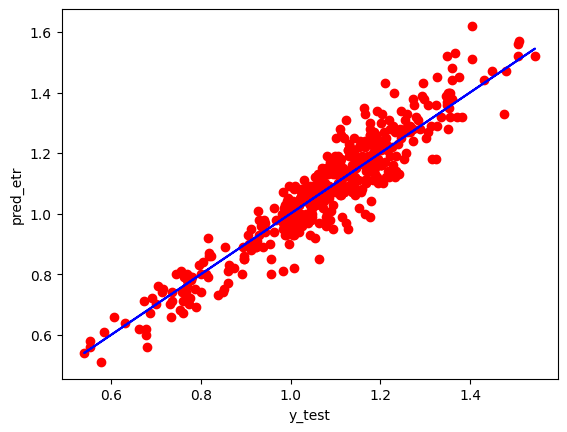

In [ ]:
plt.scatter(x=pred_etr,y=y_test,color='red')
plt.plot(pred_etr,pred_etr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_etr')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Instantiate the model
model = ExtraTreesRegressor()

# Define the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

In [ ]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(best_params)

In [ ]:
print(grid_search.best_score_)

0.8242914555550245


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Instantiate the model
model = RandomForestRegressor()

# Define the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(best_params)
print(grid_search.best_score_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.7632033275483


In [ ]:
#extratree with default paramaters performs well
model=ExtraTreesRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2 Score',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score 0.886225853749509
MAE 0.05054078947368418
MSE 0.0042609581578947325
RMSE 0.06527601518088197


In [ ]:
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','Orginal'])

In [ ]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,446,447,448,449,450,451,452,453,454,455
Predicted,1.1555,1.0464,1.1169,1.3594,1.1751,1.2249,1.1126,0.928,0.6948,1.0506,...,0.996,1.2064,1.2053,1.2005,0.8721,1.0916,1.107,1.2938,0.9791,1.0334
Orginal,1.1500,0.9800,1.1200,1.4000,1.1700,1.3000,1.0900,0.970,0.6700,1.0500,...,0.990,1.1700,1.2200,1.1000,0.8200,1.0500,1.080,1.4300,1.0000,1.0000
